### Imports

In [101]:
 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt
 import seaborn as sns
 from sklearn.preprocessing import LabelEncoder, MinMaxScaler

### Loading Datasets

In [104]:
file_path = "steps_tracker_dataset.csv"  # Ensure the file is in the working directory
df = pd.read_csv(file_path)

### Preprocessing


         date  steps  distance_km  calories_burned  active_minutes  \
0  08/10/2022   4147         3.11           124.41              41   
1  11/06/2022    323         0.24             9.69               3   
2  28/01/2022   6622         4.97           198.66              66   
3  23/03/2022  11136         8.35           334.08             111   
4  20/05/2022   2718         2.04            81.54              27   

   sleep_hours  water_intake_liters      mood  
0         10.5                 3.77  stressed  
1          6.0                 1.90       sad  
2          6.0                 4.48       sad  
3          8.0                 1.08     tired  
4          4.9                 1.00     tired  
date                   0
steps                  0
distance_km            0
calories_burned        0
active_minutes         0
sleep_hours            0
water_intake_liters    0
mood                   0
dtype: int64
           date  steps  distance_km  calories_burned  active_minutes  \
0    0

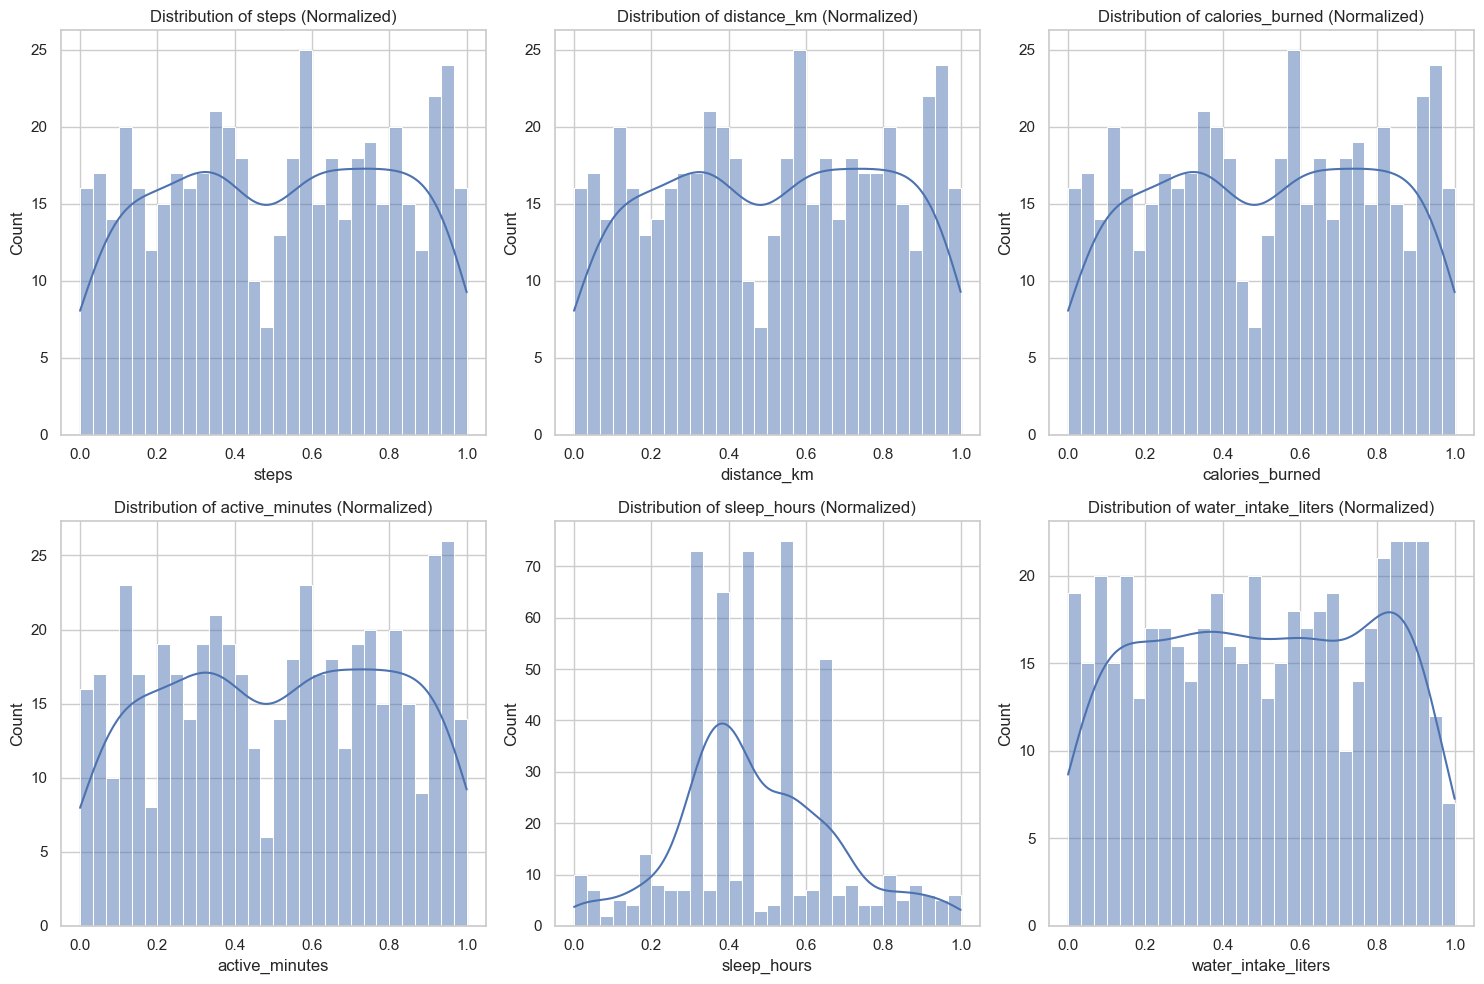

        date     steps  distance_km  calories_burned  active_minutes  \
0 2022-10-08  0.206535     0.206551         0.206535           0.205   
1 2022-06-11  0.014885     0.014706         0.014885           0.015   
2 2022-01-28  0.330577     0.330882         0.330577           0.330   
3 2022-03-23  0.556808     0.556818         0.556808           0.555   
4 2022-05-20  0.134917     0.135027         0.134917           0.135   

   sleep_hours  water_intake_liters  mood_encoded  
0     0.831461             0.752016             3  
1     0.325843             0.375000             2  
2     0.325843             0.895161             2  
3     0.550562             0.209677             4  
4     0.202247             0.193548             4  


In [107]:
#If any missing columns 
print(df.head())
print (df.isna().sum())
print (df.dropna())
print (df.info())

#Convering the date column to the correct format
df['date'] = pd.to_datetime(df['date'], format="%d/%m/%Y")
print (df.info())

# Step 3: Handle Categorical Data (Encoding 'mood')
label_encoder = LabelEncoder()
df['mood_encoded'] = label_encoder.fit_transform(df['mood'])
df.drop(columns=['mood'], inplace=True)

# Step 4: Normalize Numerical Features
scaler = MinMaxScaler()
numerical_cols = ['steps', 'distance_km', 'calories_burned', 'active_minutes', 'sleep_hours', 'water_intake_liters']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Step 5: Save Preprocessed Data
df.to_excel("preprocessed_steps_tracker.xlsx", index=False)

# Step 6: Generate and Save Distribution Plots
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(f"Distribution of {col} (Normalized)")

plt.tight_layout()
plt.savefig("preprocessing_plots.png")
plt.show()

# Step 7: Display the first few rows of the cleaned dataset
print(df.head())


### Feature Engineering

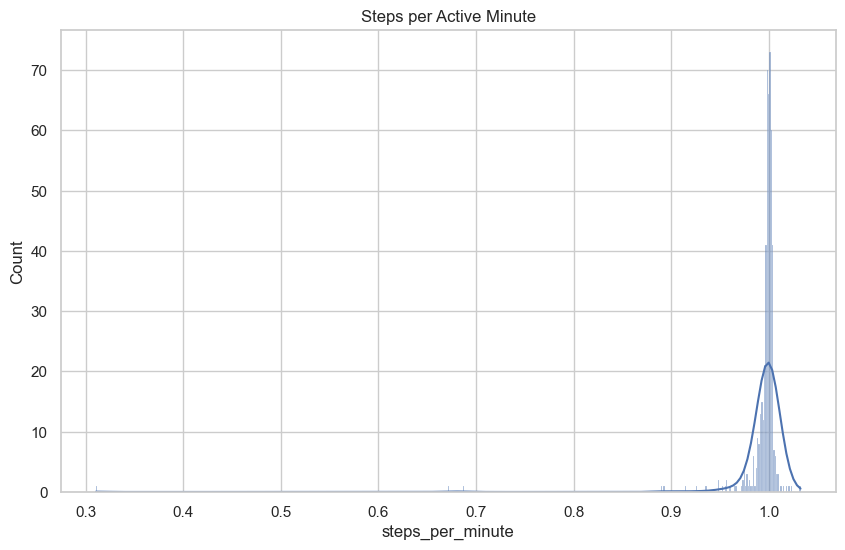

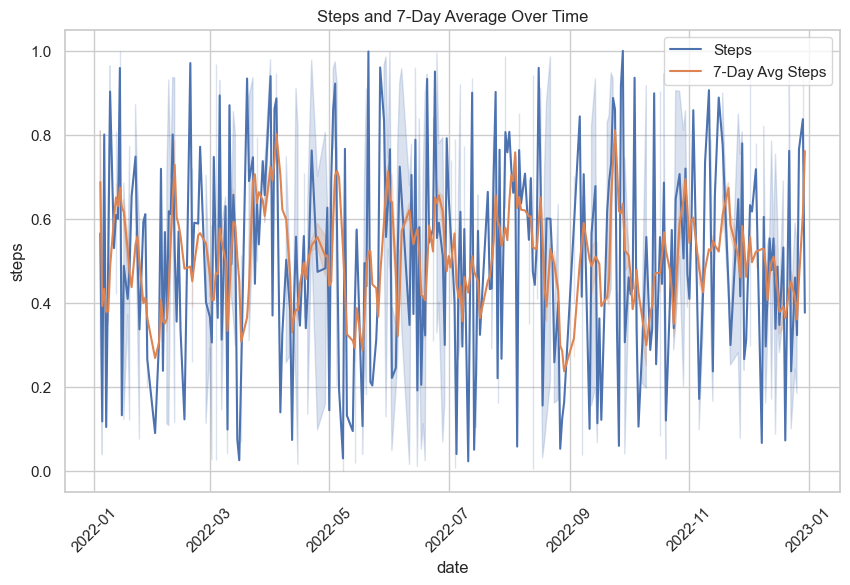

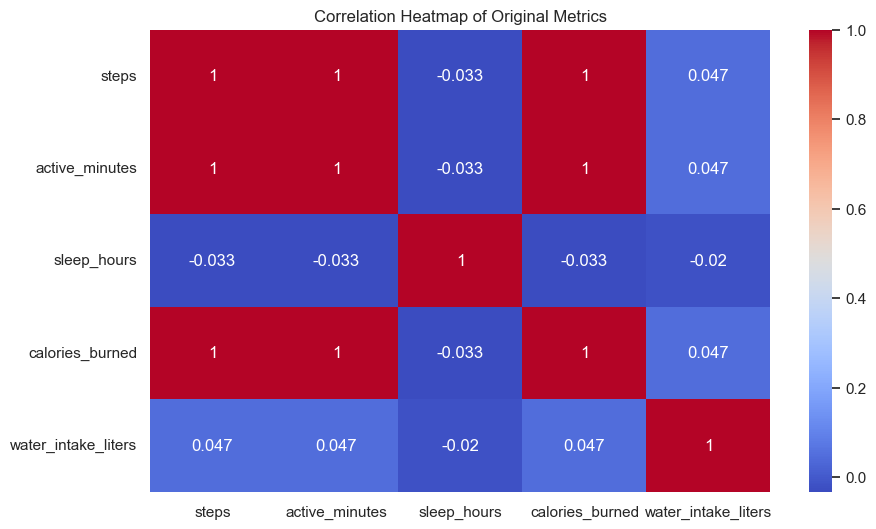

In [109]:

    # Feature engineering
    df["steps_per_minute"] = df["steps"] / df["active_minutes"].replace(0, np.nan)
    df["sleep_to_activity_ratio"] = df["sleep_hours"] / df["active_minutes"].replace(0, np.nan)
    df["hydration_per_1000_steps"] = df["water_intake_liters"] / (df["steps"] / 1000).replace(0, np.nan)
    df["calories_per_km"] = df["calories_burned"] / df["distance_km"].replace(0, np.nan)

    # Rolling averages
    df = df.sort_values("date")
    df["steps_7day_avg"] = df["steps"].rolling(window=7, min_periods=1).mean()
    df["calories_7day_avg"] = df["calories_burned"].rolling(window=7, min_periods=1).mean()

    # Save to Excel
    df.to_excel("feature_engineering_steps_tracker.xlsx", index=False)

    plt.figure(figsize=(10, 6))
    sns.histplot(df["steps_per_minute"].dropna(), kde=True)
    plt.title("Steps per Active Minute")
    plt.savefig("feature_engineering_plots.png")
    plt.show()
    plt.close()

    plt.figure(figsize=(10, 6))
    sns.lineplot(x="date", y="steps", data=df, label="Steps")
    sns.lineplot(x="date", y="steps_7day_avg", data=df, label="7-Day Avg Steps")
    plt.xticks(rotation=45)
    plt.title("Steps and 7-Day Average Over Time")
    plt.savefig("feature_engineering_plots.png")
    plt.show()
    plt.close()

    plt.figure(figsize=(10, 6))
    sns.heatmap(df[["steps", "active_minutes", "sleep_hours", "calories_burned", "water_intake_liters"]].corr(), annot=True, cmap="coolwarm")
    plt.title("Correlation Heatmap of Original Metrics")
    plt.savefig("feature_engineering_plots.png")
    plt.show()
    plt.close()

